In [34]:
#loading packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sp
import seaborn as sns

In [12]:
#import data sets
df_ws = pd.read_csv('all_players_data.csv', index_col=False, header=0)
df_tm = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)

In [13]:
df_ws.head()

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cesar Azpilicueta,0.13,0.34,0.07,0.0,0.3,84.4,7.28,2.4,1.5,...,0.1,0.3,0.5,60.4,0.3,2.5,0.1,0.1,0.1,0.1
1,N Golo Kante,0.1,0.0,0.1,0.0,0.7,86,7.34,3.4,2.1,...,0.1,1,1.2,54.1,0.2,2,0,0.5,0,0.2
2,Tiemoue Bakayoko,0.17,0.25,0.25,0.0,1.3,83.5,7.21,2.9,1.4,...,0.1,1.5,0.6,38.3,0,1.6,0,0.6,0,0.6
3,Alvaro Morata,1.21,0.28,0.19,0.0,3.1,71.1,7.03,0.2,0.1,...,1.2,2.5,0.9,17.8,0,0.7,0,0.7,0.4,2
4,Eden Hazard,1.07,0.24,0.0,0.0,1.7,83.3,7.45,0.2,0,...,0.5,1.5,2.8,33.9,0.3,1.9,0,0.6,0,1.1


In [25]:
df_ws.dropna(how='all')

,Player Name,Goals/90min,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cesar Azpilicueta,0.13,0.34,0.07,0.0,0.3,84.4,7.28,2.4,1.5,...,0.1,0.3,0.5,60.4,0.3,2.5,0.1,0.1,0.1,0.1
1,N Golo Kante,0.1,0.0,0.1,0.0,0.7,86,7.34,3.4,2.1,...,0.1,1,1.2,54.1,0.2,2,0,0.5,0,0.2
2,Tiemoue Bakayoko,0.17,0.25,0.25,0.0,1.3,83.5,7.21,2.9,1.4,...,0.1,1.5,0.6,38.3,0,1.6,0,0.6,0,0.6
3,Alvaro Morata,1.21,0.28,0.19,0.0,3.1,71.1,7.03,0.2,0.1,...,1.2,2.5,0.9,17.8,0,0.7,0,0.7,0.4,2
4,Eden Hazard,1.07,0.24,0.0,0.0,1.7,83.3,7.45,0.2,0,...,0.5,1.5,2.8,33.9,0.3,1.9,0,0.6,0,1.1
5,Cesc Fabregas,0.08,0.16,0.0,0.08,1.2,82.9,7.16,2.4,0.9,...,0.1,0.7,3,70,1.3,4.2,0.4,0.6,0.2,0.4
6,Marcos Alonso,0.14,0.07,0.21,0.0,1.5,78.5,7.13,2.2,1.4,...,0.3,0.9,0.7,36.2,0.3,1.1,0,0.5,0.1,0.9
7,David Luiz,0.19,0.0,0.38,0.09,1.1,86.8,6.96,2,2.6,...,0,0.5,0.2,48.1,0,4.1,0,0.8,0,0.3
8,Antonio Rudiger,0.21,0.1,0.42,0.0,0.3,88.4,6.69,1.3,1.1,...,0.1,0.3,0.2,46.3,0.1,3,0,0.2,0,0.1
9,Andreas Christensen,0.15,0.0,0.0,0.0,0.2,92.7,6.82,1.1,1.7,...,0,0,0.1,34.5,0,1.8,0,0,0,0.2


In [5]:
df_tm.head()

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,Current.market.value,Highest.market.value,City.of.birth,Country.of.birth,Birth.country.code,Continent,Continent.specific
0,Ederson,"Aug 17, 1993","Osasco (SP), Brazil",24,1.88,NaN,"Brazil, Portugal",Goalkeeper,left,Manchester City,22000000.0,22000000.0,Osasco (SP),Brazil,BR,South America,Brazil
1,Claudio Bravo,"Apr 13, 1983","Viluco, Chile",34,1.84,NaN,"Chile, Spain",Goalkeeper,right,Manchester City,8000000.0,15000000.0,Viluco,Chile,CL,South America,Andean
2,John Stones,"May 28, 1994","Barnsley, England",23,1.88,NaN,England,Defence - Centre-Back,right,Manchester City,35000000.0,35000000.0,Barnsley,United Kingdom,GB,Europe,Western Europe
3,Nicolas Otamendi,"Feb 12, 1988","Buenos Aires, Argentina",29,1.83,NaN,Argentina,Defence - Centre-Back,right,Manchester City,30000000.0,32000000.0,Buenos Aires,Argentina,AR,South America,South
4,Vincent Kompany,"Apr 10, 1986","Uccle, Belgium",31,1.93,NaN,"Belgium, Congo DR",Defence - Centre-Back,right,Manchester City,22000000.0,35000000.0,Uccle,Belgium,BE,Europe,Central Europe


In [37]:
df_tmh = df_tm.sort_values('highest_market_value', ascending=False)
df_tmh = df_tmh[df_tmh['highest_market_value'] >= 1000000]

In [38]:
#narrow transfermarket data set to just strikers
df_tmh.loc[df_tm['Position'].str.contains('Striker', case=False), 'Position'] = 'Striker'
df_tmh.loc[df_tm['Position'].str.contains('Midfield', case=False), 'Position'] ='Midfielder'
df_tmh.loc[df_tm['Position'].str.contains('Defence', case=False), 'Position'] = 'Defender'

In [39]:
list(df_ws.columns.values)

['Player Name',
 'Goals/90min',
 'Assists/90min',
 'Yel/90min',
 'Red/90min',
 'SpG',
 'PS%',
 'Rating',
 'Tackles',
 'Inter',
 'Fouls (def)',
 'Offsides',
 'Clear',
 'DrB (def)',
 'Blocks',
 'DrB (off)',
 'Fouled (off)',
 'Off (off)',
 'Disp (off)',
 'KeyP',
 'AvgP',
 'Crosses',
 'LongB',
 'ThrB',
 'OutOfBox',
 'SixYardBox',
 'PenaltyArea']

In [40]:
df_tmh = df_tmh.rename(columns={'Current.market.value': 'current_market_value', 'Current.club': 'current_club','Highest.market.value': 'highest_market_value', 'Place.of.birth': 'place_of_birth', 'Date.of.birth': 'date_of_birth'})

In [41]:
#narrow data from transfermarkt above 100,000 euros in market value
#merge with ws data set by player name. may need to adjust player names to match one thing for sure is to remove the ' symbol like n"golo
df = pd.merge(left=df_tmh, right=df_ws, left_on='Name', right_on='Player Name')

In [42]:
df.head(n=100)

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cristiano Ronaldo,"Feb 5, 1985","Funchal, Portugal",32,1.85,NaN,Portugal,Striker,both,Real Madrid,...,1.6,0.6,1.6,28,0.3,0.5,0.2,1.6,0.7,4.8
1,Lionel Messi,"Jun 24, 1987","Rosario, Argentina",30,1.70,8.5,"Argentina, Spain",Striker,left,FC Barcelona,...,0.5,3.5,2.2,53.3,0.4,2.4,0.4,2.7,0.4,2.9
2,Neymar,"Feb 5, 1992","Mogi das Cruzes, Brazil",25,1.75,NaN,Brazil,Striker,both,Paris Saint-Germain,...,0.5,3.5,3.8,61.2,1.2,2.1,1.3,1.5,0.1,2
3,Luis Suarez,"Jan 24, 1987","Salto, Uruguay",30,1.82,NaN,Uruguay,Striker,right,FC Barcelona,...,1.7,1.5,0.9,31.1,0,1.3,0.2,0.9,0.5,2.6
4,Gareth Bale,"Jul 16, 1989","Cardiff, Wales",28,1.83,NaN,Wales,Striker,left,Real Madrid,...,0.4,0.6,2.7,27.6,0.7,1.6,0,0.3,0.3,2.3
5,James Rodriguez,"Jul 12, 1991","Cucuta, Colombia",26,1.80,NaN,Colombia,Midfielder,left,Bayern Munich,...,0.1,0.9,2.4,48.2,1.5,3.7,0.5,0.7,0,0.7
6,Paul Pogba,"Mar 15, 1993","Lagny-sur-Marne, France",24,1.91,NaN,"France, Guinea",Midfielder,both,Manchester United,...,0.2,2.2,1.8,65.2,0,3,0.4,1.8,0.2,1.4
7,Antoine Griezmann,"Mar 21, 1991","Macon, France",26,1.75,NaN,France,Striker,left,Atletico Madrid,...,0.8,0.8,1.4,26.2,0.4,0.6,0.1,0.9,0.1,1.4
8,Robert Lewandowski,"Aug 21, 1988","Warszawa, Poland",29,1.84,NaN,Poland,Striker,right,Bayern Munich,...,1,1.1,1.3,22.5,0.1,0.5,0,1.1,0.4,2.7
9,Gonzalo Higuain,"Dec 10, 1987","Brest, France",29,1.84,NaN,"Argentina, France",Striker,right,Juventus FC,...,1,2.2,1.1,21.1,0,1.5,0.2,0.7,0.1,2.1


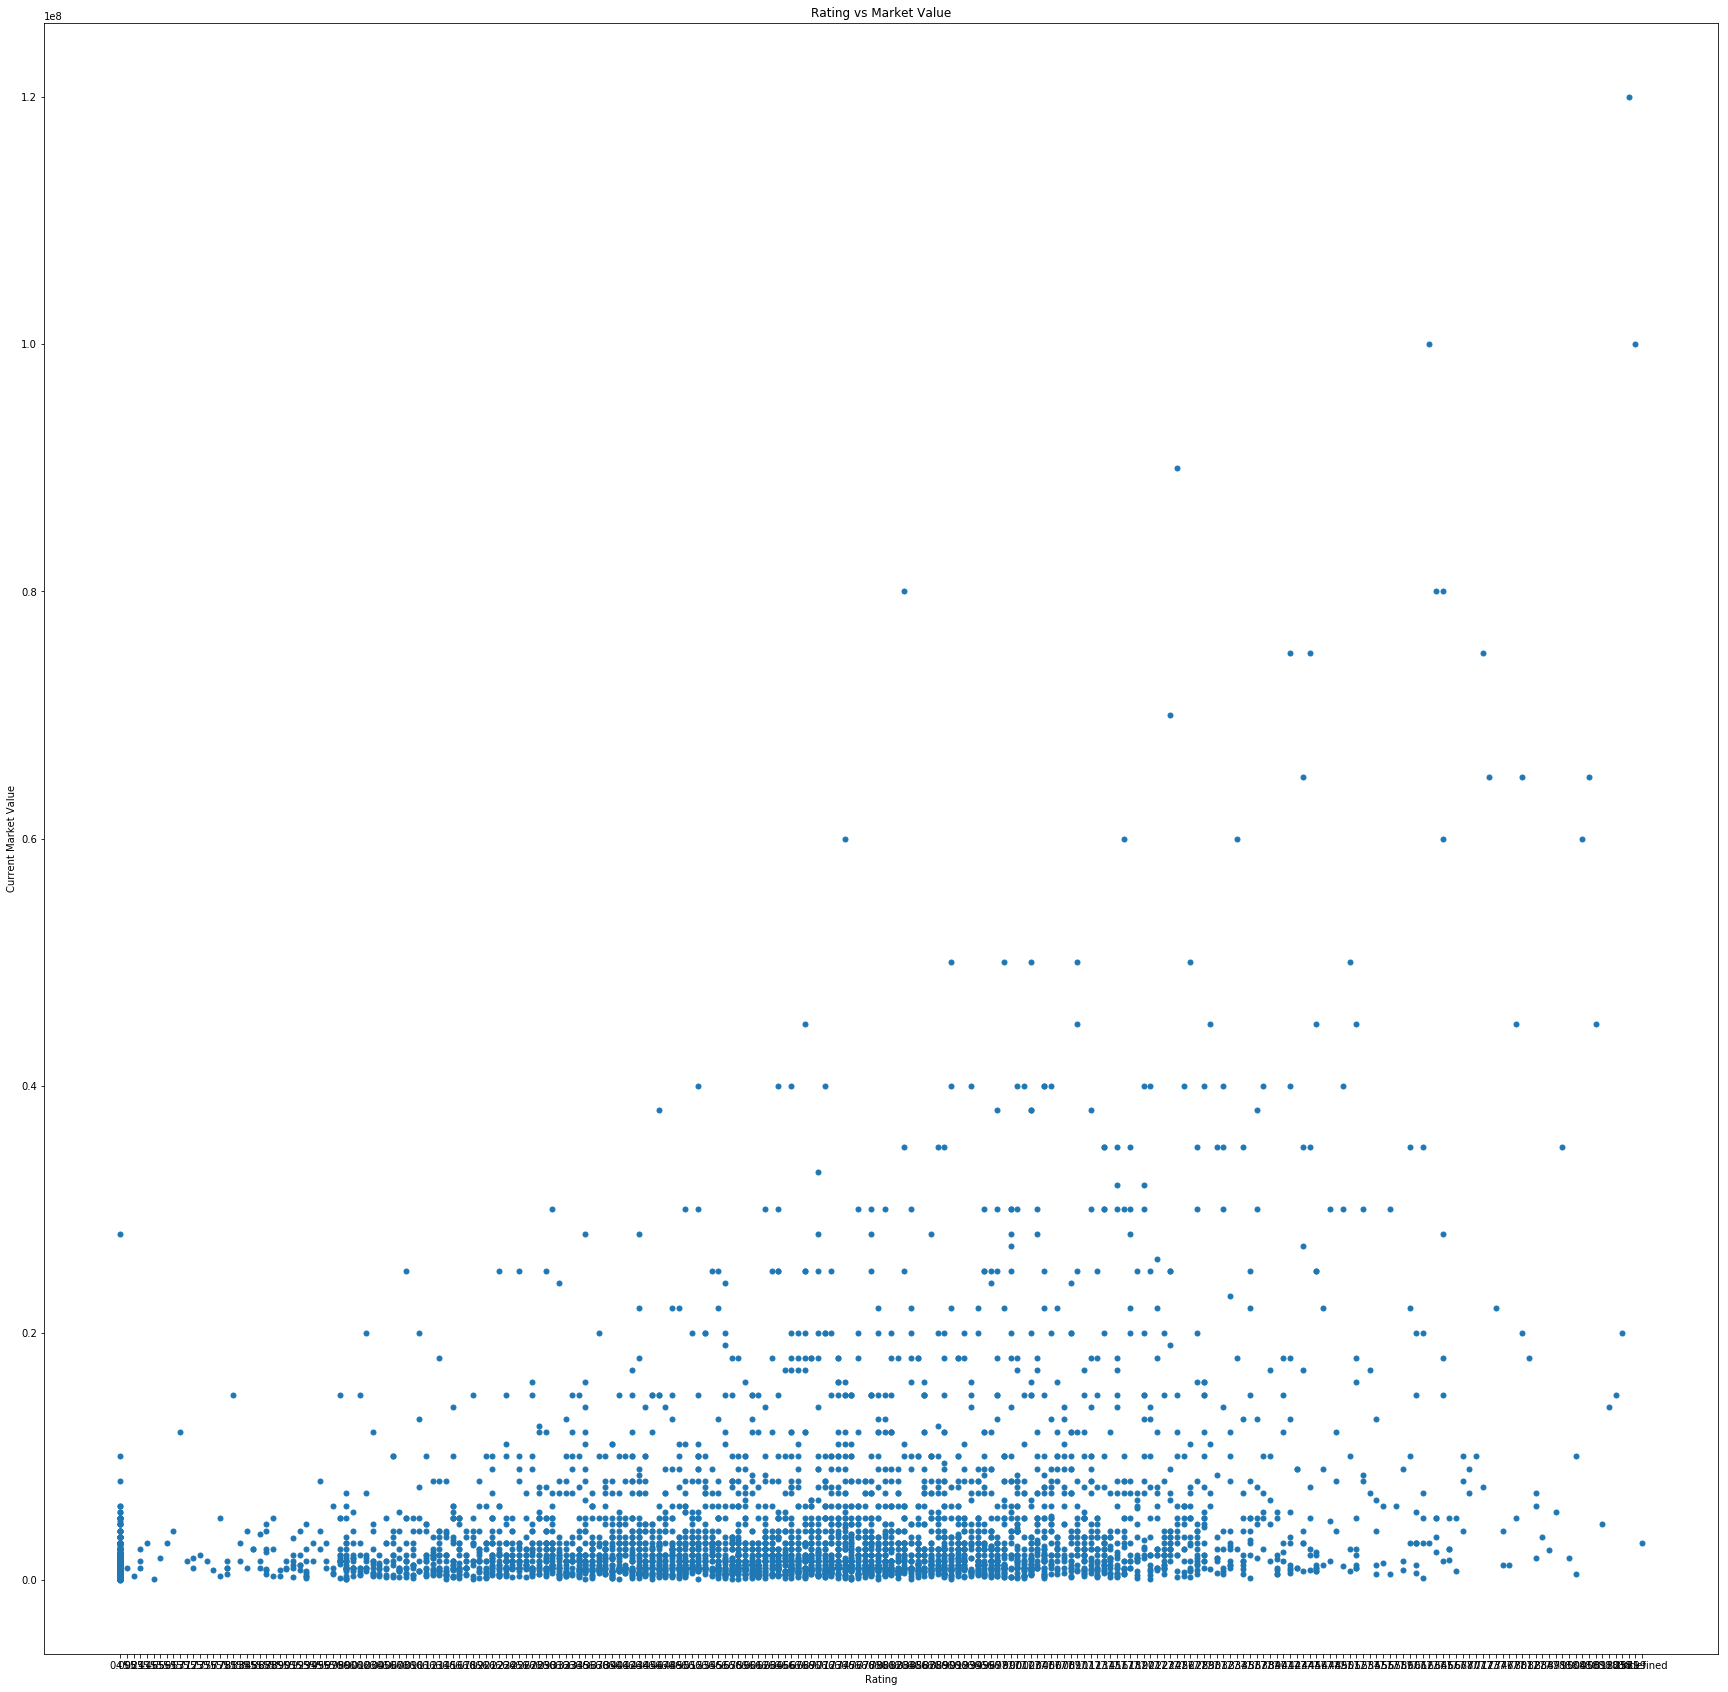

In [47]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value')
plt.show()

In [48]:
#df['Rating'].corr(df['current_market_value'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [52]:
df.describe()

,Height,Shoe.size,current_market_value,highest_market_value
count,5196.000000,125.000000,5.205000e+03,5.206000e+03
mean,1.815064,9.868000,4.008378e+06,6.029802e+06
std,0.066300,1.183121,7.604345e+06,8.947954e+06
min,1.600000,7.500000,2.500000e+04,1.000000e+06
25%,1.770000,9.000000,8.000000e+05,1.500000e+06
50%,1.820000,10.000000,1.500000e+06,3.000000e+06
75%,1.860000,10.500000,3.500000e+06,6.500000e+06
max,2.030000,13.000000,1.200000e+08,1.200000e+08


In [78]:
df.dtypes
df[['Rating']] = df[['Rating']].astype(float)
#df.boxplot(column='Rating')

ValueError: could not convert string to float: 'Undefined'

In [77]:
df_mvr = df[['Rating', 'current_market_value', 'Position']]
df_mvr.head(n=1000)
df_mvr = df_mvr.sort_values('Rating')
df_mvr.head(n=1075)

,Rating,current_market_value,Position
3793,0.00,1500000.0,Midfielder
3729,0.00,1750000.0,Defender
1352,0.00,700000.0,Defender
1349,0.00,3000000.0,Midfielder
3736,0.00,1750000.0,Striker
1347,0.00,250000.0,Striker
1345,0.00,150000.0,Defender
3738,0.00,250000.0,Striker
3740,0.00,200000.0,Striker
3742,0.00,1000000.0,Defender


In [65]:
#df_mvr.dropna()
#df_mvr['Rating'] = df_mvr.Rating.astype(float)

ValueError: could not convert string to float: 'Undefined'

In [58]:
df_mvr = df_mvr.sort_values('Rating', ascending=False)
df_mvr = df_mvr[df_mvr['Rating'] > 0]

TypeError: '>' not supported between instances of 'str' and 'int'